# Songwriting and Language Generation using TensorFlow
## Writing a sonnet in the style of William Shakespeare using a RNN
Name : Nirmit Pate

Email : npatel13@syr.edu

All of the writing in this document is my original work, except for the code excerpts and any quoted material for which I have provided a citation

This project is based heavily upon the first lab exercise from MIT Deep Learning 6.S191, in which a Recurrent Neural Network (RNN) is used to generate synthetic music based upon Irish folk songs.

I have adapted the code to generate Shakespearean Sonnets rather than music, using the entirety of the sonnets of William Shakespeare to train the model.

As my final project for my natural language processing class I choose Lyrics generation. We were given a GItHub repository for our projects as a baseline, to improve upon it and change it in a way that runs on our google collab jupyter notebook. The original GitHub repository for my project was created by jwlibre. It uses the RNN model to automatically generate the lyrics for a sonnet using Shakespeare’s sonnets as our input for our RNN model. This project is based on MIT's deep learning class where we are generating synthetic lyrics of a song based on Irish folk songs as an input to our RNN. I have changed the code here to generate sonnets in the style of Shakespeare’s writing style. For this project I am using the following technologies : tensorFlow, pandas, tqdm, notebook, beautifulsoup4 and matplotlib. 

My project takes these Shakespeare’s sonnets from the website https://shakespeares-sonnets.com, after performing various data cleaning processes it feeds this data into an RNN model to generate lyrics. To generate those lyrics we are using Recurrent Neural Network(RNN). Recurrent neural networks (RNNs) are a class of neural networks that are helpful in modeling sequence data. Derived from feedforward networks, RNNs exhibit similar behavior to how human brains function. Simply put: recurrent neural networks produce predictive results in sequential data that other algorithms can’t.

For anyone else looking to learn more about Deep Learning I thoroughly recommend checking out the lectures and exercises from the aforementioned MIT open course at http://introtodeeplearning.com/

Original Auther : jwlibre(Jeremy) https://github.com/jwlibre

Sonnets sourced from http://www.shakespeares-sonnets.com/all.php

Source code used under the MIT License.
© MIT 6.S191: Introduction to Deep Learning

http://introtodeeplearning.com

In [ ]:
# Code block 1
import tensorflow as tf
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

First, we need to obtain our input data - the complete collection of Shakespeare's sonnets.
We can scrape this information using the Beautiful Soup library.

In [ ]:
# Code block 2
url = 'http://www.shakespeares-sonnets.com/all.php'
page = requests.get(url)

# create an instance of the BeautifulSoup class, which will parse the html (content) from the requests response
soup = BeautifulSoup(page.content, 'html.parser')
alltext = soup.get_text()

In [ ]:
# Code block 3
# trim to retrieve only the sonnets from the webpage
alltext = alltext[alltext.index('All Sonnets'):alltext.index('Copyright')]
print(alltext)

All Sonnets
I.
From fairest creatures
we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world's fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And, tender churl, mak'st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world's due, by the grave and thee.
II.
When
forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held: 
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days; 
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more

Now that we have the raw input data, we need to tidy it up a little. For example, each sonnet is labelled by its number in Roman numerals. We don't want to include these Roman numerals in the vocabulary when generating new sonnets, so we must remove them from the text.

In [ ]:
# Code block 4
regex = "[XICVL]+\.\n"
alltext = re.sub(regex, "", alltext)
print(alltext)

All Sonnets
From fairest creatures
we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world's fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And, tender churl, mak'st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world's due, by the grave and thee.
When
forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held: 
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days; 
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise

Convert the text to lowercase and remove the newline characters, to allow us to count instances of the same word (regardless of their capitalisation).

In [ ]:
# Code block 5
alltext = alltext.replace("\n"," ").lower()
print(alltext)

 within and suffer dearth, painting thy outward walls so costly gay? why so large cost, having so short a lease, dost thou upon thy fading mansion spend? shall worms, inheritors of this excess, eat up thy charge? is this thy body's end? then soul, live thou upon thy servant's loss, and let that pine to aggravate thy store; buy terms divine in selling hours of dross; within be fed, without be rich no more: so shall thou feed on death, that feeds on men, and death once dead, there's no more dying then. my love is as a fever longing still, for that which longer nurseth the disease; feeding on that which doth preserve the ill, the uncertain sickly appetite to please. my reason, the physician to my love,  angry that his prescriptions are not kept, hath left me, and i desperate now approve desire is death, which physic did except. past cure i am, now reason is past care, and frantic-mad with evermore unrest; my thoughts and my discourse as madmen's are, at random from the truth vainly expres

Split the text by whitespace characters to generate a list of words.

In [ ]:
# Code block 6
alltext = alltext.split(' ')
print(alltext)

['all', 'sonnets', 'from', 'fairest', 'creatures\r', 'we', 'desire', 'increase,', 'that', 'thereby', "beauty's", 'rose', 'might', 'never', 'die,', 'but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease,', 'his', 'tender', 'heir', 'might', 'bear', 'his', 'memory:', 'but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes,', "feed'st", 'thy', "light's", 'flame', 'with', 'self-substantial', 'fuel,', 'making', 'a', 'famine', 'where', 'abundance', 'lies,', 'thy', 'self', 'thy', 'foe,', 'to', 'thy', 'sweet', 'self', 'too', 'cruel:', 'thou', 'that', 'art', 'now', 'the', "world's", 'fresh', 'ornament,', 'and', 'only', 'herald', 'to', 'the', 'gaudy', 'spring,', 'within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content,', 'and,', 'tender', 'churl,', "mak'st", 'waste', 'in', 'niggarding:', 'pity', 'the', 'world,', 'or', 'else', 'this', 'glutton', 'be,', 'to', 'eat', 'the', "world's", 'due,', 'by', 'the', 'grave', 'and', 'thee.', 'when\r', 'forty', 'winters', 'shall', 'besiege',

A cursory glance at our body of text shows that there are instances of characters that will prevent us from creating a vocabulary of unique words.
For example, we don't want to distinguish between "joy" and "joy;", so we should remove the semicolons from the text.

In [ ]:
# Code block 7
char_to_remove = ["(", ")", "\"", "\'", "", ":", ";", ",", ".", "!", "?", "\“", "\…", "<u+203d>", "\r", "\xa0", "-"]
clean_text = list(alltext)
for character in char_to_remove:
    clean_text = [word.replace(character,"") for word in clean_text]
clean_text = [word for word in clean_text if word != ""]
# remove the first two words "All Sonnets"
clean_text = clean_text[2:]
print(clean_text)

['from', 'fairest', 'creatures', 'we', 'desire', 'increase', 'that', 'thereby', 'beautys', 'rose', 'might', 'never', 'die', 'but', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease', 'his', 'tender', 'heir', 'might', 'bear', 'his', 'memory', 'but', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes', 'feedst', 'thy', 'lights', 'flame', 'with', 'selfsubstantial', 'fuel', 'making', 'a', 'famine', 'where', 'abundance', 'lies', 'thy', 'self', 'thy', 'foe', 'to', 'thy', 'sweet', 'self', 'too', 'cruel', 'thou', 'that', 'art', 'now', 'the', 'worlds', 'fresh', 'ornament', 'and', 'only', 'herald', 'to', 'the', 'gaudy', 'spring', 'within', 'thine', 'own', 'bud', 'buriest', 'thy', 'content', 'and', 'tender', 'churl', 'makst', 'waste', 'in', 'niggarding', 'pity', 'the', 'world', 'or', 'else', 'this', 'glutton', 'be', 'to', 'eat', 'the', 'worlds', 'due', 'by', 'the', 'grave', 'and', 'thee', 'when', 'forty', 'winters', 'shall', 'besiege', 'thy', 'brow', 'and', 'dig', 'deep', 'trenches'

Now that we've cleaned up our input text, let's create a vocabulary of all the unique words in the text. This will be the set of words that our neural network will be able to draw from to create a new sonnet.

In [ ]:
# Code block 8
# Find all unique characters in the joined string
vocab = sorted(set(clean_text))
print(vocab)
print("There are", len(vocab), "unique words in the sonnets")

['a', 'abhor', 'abide', 'able', 'about', 'above', 'absence', 'absent', 'abundance', 'abundant', 'abuse', 'abused', 'abuses', 'abysm', 'accents', 'acceptable', 'acceptance', 'accessary', 'accident', 'accidents', 'account', 'accumulate', 'accuse', 'accusing', 'achieve', 'acknowledge', 'acquaintance', 'acquainted', 'act', 'action', 'active', 'actor', 'add', 'added', 'adders', 'addeth', 'adding', 'addition', 'adieu', 'adjunct', 'admire', 'admired', 'admiring', 'admit', 'admitted', 'adonis', 'adore', 'adoting', 'adulterate', 'advance', 'advantage', 'adverse', 'advisd', 'advocate', 'afar', 'affable', 'affairs', 'affections', 'afford', 'affords', 'afloat', 'afresh', 'after', 'afterloss', 'afterwards', 'again', 'against', 'age', 'ages', 'aggravate', 'ah', 'aid', 'air', 'alack', 'alas', 'alchemy', 'alien', 'alike', 'alive', 'all', 'allayed', 'alleating', 'allege', 'allow', 'alltheworld', 'almost', 'aloft', 'alone', 'already', 'alter', 'alteration', 'altered', 'altering', 'alters', 'although', '

We now create a mapping to represent each unique word in the vocabulary with its own integer value. We also create a reverse mapping to allow us to translate back from id numbers to words. This will allow the neural network to work with numerical representations of the words, rather than entire words themselves.

In [ ]:
# Code block 9
# Create a mapping of words to numbers
word2idx = {u:i for i, u in enumerate(vocab)}

# Reverse the mapping
idx2word = np.array(vocab)

Using the mapping, we can convert phrases of words into vectors of numbers, which will be used to train the model. This is a vital step, because the Embedding layer (which is the first hidden layer of the neural network, a flexible layer which can learn that certain groupings of words appear together more often) requires vectors of numbers as input. The vectorize_string function will also be useful at the end when we will need to vectorize an input seed phrase to the model to generate new text.

In [ ]:
# Code block 10
# Function to vectorize a given input string of words
def vectorize_string(string):
  vectorized_words = []
  for word in string:
      vectorized_words.append(word2idx[word])
  vectorized_words = np.array(vectorized_words)
  return vectorized_words

To demonstrate this in action, let's see what a vectorized representation of the first 10 words of the input text would look like:

In [ ]:
# Code block 11
vectorized_words = vectorize_string(clean_text[:10])
print(vectorized_words)

[1104  934  568 3016  687 1399 2707 2720  216 2257]


Don't forget, we now need to vectorize the entire input text!

In [ ]:
# Code block 12
vectorized_words = vectorize_string(clean_text)

To train the model, we need to break the training data into training examples and feed them to the model sequentially. This is because the RNN has diminishing returns in terms of its ability to remember context - if each training example consists of more timesteps, by the time the RNN reaches the last timestep in the training example it will have retained less of the information from the first timestep than it would have done had there been fewer timesteps.<br><br>
Each training example is comprised of <code>seq_length</code> time steps. The input at each time step is a single word, fed into the embedding layer, which converts the single integer input into a layer of <code>embedding_dim</code> neurons. The output from the embedding layer is passed to the LSTM cell, which performs some computations involving both the current input and the previous hidden state. The hidden state is updated with the information learned from the latest input and passed onto the next timestep.<br><br>
In addition, at each timestep the network outputs a prediction for the next word in the sequence. It is easy for the network to compute the loss of this guess by comparing its prediction to the next input word.<br><br>
The <code>batch_size</code> is the number of training examples, each of length <seq_length> words, that the network should process before performing backpropagation.

In [ ]:
# Code block 13
def get_batch(vectorized_words, seq_length, batch_size):
  # the length of the vectorized_words string
  n = vectorized_words.shape[0] - 1
  # randomly choose the starting indices for the examples in the training batch
  idx = np.random.choice(n-seq_length, batch_size)

  # construct a list of input sequences for the training batch
  input_batch = [vectorized_words[i:i+seq_length] for i in idx]
  # construct a list of output sequences for the training batch
  output_batch = [vectorized_words[i+1:i+1+seq_length] for i in idx]

  # x_batch, y_batch provide the true inputs and targets for network training
  x_batch = np.reshape(input_batch, [batch_size, seq_length])
  y_batch = np.reshape(output_batch, [batch_size, seq_length])

  return x_batch, y_batch

In [ ]:
# Code block 14
# Demonstrate the batching over the timesteps
x_batch, y_batch = get_batch(vectorized_words, seq_length=4, batch_size=1)
print(x_batch)
print(y_batch)
for i, (input_idx, target_idx) in enumerate(zip(np.squeeze(x_batch), np.squeeze(y_batch))):
    print("Step {:3d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2word[input_idx])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2word[target_idx])))

[[1951  922 2781 2648]]
[[ 922 2781 2648   66]]
Step   0
  input: 1951 ('perjured')
  expected output: 922 ('eye')
Step   1
  input: 922 ('eye')
  expected output: 2781 ('to')
Step   2
  input: 2781 ('to')
  expected output: 2648 ('swear')
Step   3
  input: 2648 ('swear')
  expected output: 66 ('against')


Next, we'll write a function that can create a hidden layer of parallel LSTM units.

In this notation, <code>rnn_units</code> refers to the number of rnn cells that take up the hidden layer of a given timestep's neural network.

You can basically imagine an individual timestep as having its own neural network, where each node in the hidden layer is an LSTM node instead of a basic neuron.

In [ ]:
# Code block 15
def LSTM(rnn_units): 
  return tf.keras.layers.LSTM(
    rnn_units, 
    return_sequences=True, 
    recurrent_initializer='glorot_uniform',
    recurrent_activation='sigmoid',
    stateful=True,
  )

Now we can set out the structure of the network itself, which will comprise:<br>
i) an Embedding layer, which takes as its input one word from the vectorized string at a time, which gets converted into a 'dense vector' of dimension <code>embedding_dim</code>.<br>
ii) an LSTM layer, containing rnn_units number of LSTM cells (as explained in the previous cell).<br>
iii) an Output layer, of <code>vocab_size</code> neurons, which will output a number corresponding to the vocabulary index of the predicted next word in the sentence.

In [ ]:
# Code block 16
### Defining the RNN Model ###

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
  model = tf.keras.Sequential([
    # Layer 1: Embedding layer to transform indices into dense vectors 
    #   of a fixed embedding size
    tf.keras.layers.Embedding(vocab_size, embedding_dim, batch_input_shape=[batch_size, None]),

    # Layer 2: LSTM with `rnn_units` number of units. 
    LSTM(rnn_units),

    # Layer 3: Dense (fully-connected) layer that transforms the LSTM output
    #   into the vocabulary size. 
    tf.keras.layers.Dense(vocab_size)
  ])

  return model

# Build a simple model with default hyperparameters
model = build_model(len(vocab), embedding_dim=256, rnn_units=1024, batch_size=32)

And just like that, we have an untrained model! Below is a summary of its structure.

In [ ]:
# Code block 17
model.summary()
print("\n\nVocab length = {}".format(len(vocab)))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (32, None, 256)           817920    
                                                                 
 lstm (LSTM)                 (32, None, 1024)          5246976   
                                                                 
 dense (Dense)               (32, None, 3195)          3274875   
                                                                 
Total params: 9,339,771
Trainable params: 9,339,771
Non-trainable params: 0
_________________________________________________________________


Vocab length = 3195


Let's supply it with a test input to demonstrate how the outputs will look.<br>
We shouldn't expect our predictions to be very good, as we haven't trained the model yet.

In [ ]:
# Code block 18
x, y = get_batch(vectorized_words, seq_length=100, batch_size=32)
print("x: {}".format(x))
print("y: {}".format(y))
pred = model(x)
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")

x: [[2781  576 1451 ... 1602 1845 2710]
 [2561 2707 3134 ... 2279  761  204]
 [2707 2741 1807 ... 1218 1394 1861]
 ...
 [  33 2025  255 ... 1052  144 3183]
 [2372 3183 1898 ... 1845 1608 3107]
 [2582  388 1568 ... 1319 2257 1437]]
y: [[ 576 1451 3107 ... 1845 2710 3084]
 [2707 3134 1104 ...  761  204 1763]
 [2741 1807 1620 ... 1394 1861 1845]
 ...
 [2025  255 1824 ...  144 3183 3038]
 [3183 1898 1079 ... 1608 3107    0]
 [ 388 1568 2646 ... 2257 1437 2841]]
Input shape:       (32, 100)  # (batch_size, sequence_length)
Prediction shape:  (32, 100, 3195) # (batch_size, sequence_length, vocab_size)


Let's inspect the output from the first training example.

tf.Tensor(
[[-0.00091538 -0.00259986 -0.00155242 ... -0.00165237 -0.00051236
   0.00260193]
 [-0.00287489  0.00017441 -0.00098445 ...  0.00090537 -0.00115188
   0.00144425]
 [-0.00233887  0.00161859  0.00320833 ... -0.00036926 -0.00334957
   0.00113844]
 ...
 [-0.00108922 -0.00262907  0.00617535 ...  0.00463727  0.0043608
  -0.00216339]
 [-0.00353787 -0.00383056  0.01057097 ...  0.00517856  0.00263499
  -0.00351241]
 [-0.00570012 -0.00671352  0.00725086 ...  0.00326087  0.0020371
  -0.00236038]], shape=(100, 3195), dtype=float32)
tf.Tensor(
[-0.00091538 -0.00259986 -0.00155242 ... -0.00165237 -0.00051236
  0.00260193], shape=(3195,), dtype=float32)
[   0    1    2 ... 3192 3193 3194]
(3195,)


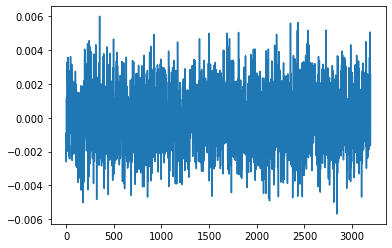

In [ ]:
# Code block 19
print(pred[0])
# We'll see it's a matrix (tensor) of 100 rows by 3195 columns. This means it contains information for 100 predicted words, which makes sense, as we input 100 words per training example (this is the seq_length)
# let's have a look at the distribution of probabilities for just the first word
print(pred[0][0])
ind = np.array(range(3195))
print(ind)
print(ind.shape)
plt.plot(ind, pred[0][0])
plt.show()
# As the plot shows, the model doesn't really have a clue which word to pick! There's no clear winner on the probability.

Let's actually extract the predictions from the untrained model by taking samples from the output probability distribution. The TensorFlow documentation explains why we need to do this, rather than just take the index correspoinding to the maximum value in the output vector: "To get actual predictions from the model we need to sample from the output distribution, to get actual character indices. This distribution is defined by the logits over the character vocabulary. It is important to sample from this distribution as taking the argmax of the distribution can easily get the model stuck in a loop."

In [ ]:
# Code block 20
sampled_indices = tf.random.categorical(pred[0], num_samples=1)
print(sampled_indices)
# reshape the sampled indices into a numpy array
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()
print(sampled_indices)

tf.Tensor(
[[2417]
 [  90]
 [ 205]
 [ 888]
 [2064]
 [1496]
 [1294]
 [1787]
 [ 777]
 [ 916]
 [3068]
 [ 779]
 [ 241]
 [2698]
 [1530]
 [2638]
 [3081]
 [ 199]
 [1734]
 [1790]
 [1981]
 [ 219]
 [2192]
 [ 980]
 [ 799]
 [1552]
 [ 188]
 [1445]
 [1687]
 [1721]
 [ 353]
 [ 238]
 [ 371]
 [2041]
 [ 305]
 [1200]
 [ 811]
 [1029]
 [2457]
 [1737]
 [1328]
 [2873]
 [3150]
 [ 137]
 [2758]
 [2329]
 [2052]
 [3039]
 [1182]
 [1887]
 [2771]
 [2561]
 [ 546]
 [2205]
 [1911]
 [1705]
 [ 513]
 [2715]
 [ 853]
 [2358]
 [1866]
 [2524]
 [2831]
 [1196]
 [1747]
 [1657]
 [3040]
 [3173]
 [ 627]
 [ 357]
 [ 314]
 [1202]
 [3136]
 [  53]
 [ 205]
 [ 917]
 [1874]
 [   8]
 [2469]
 [1103]
 [ 261]
 [1560]
 [2060]
 [2836]
 [1794]
 [1332]
 [  87]
 [1277]
 [2538]
 [2925]
 [1754]
 [ 130]
 [2997]
 [ 241]
 [ 851]
 [1887]
 [2244]
 [2329]
 [2668]
 [ 224]], shape=(100, 1), dtype=int64)
[2417   90  205  888 2064 1496 1294 1787  777  916 3068  779  241 2698
 1530 2638 3081  199 1734 1790 1981  219 2192  980  799 1552  188 1445
 1687 1721  353 

In [ ]:
# Code block 21
# Decode predictions from untrained model, find they're a bit rubbish
print(x)
print("Input: \n", repr(" ".join(idx2word[x[0]])))
print()
print("Next Word Predictions: \n", repr(" ".join(idx2word[sampled_indices])))

[[2781  576 1451 ... 1602 1845 2710]
 [2561 2707 3134 ... 2279  761  204]
 [2707 2741 1807 ... 1218 1394 1861]
 ...
 [  33 2025  255 ... 1052  144 3183]
 [2372 3183 1898 ... 1845 1608 3107]
 [2582  388 1568 ... 1319 2257 1437]]
Input: 
 'to cross join with the spite of fortune make me bow and do not drop in for an afterloss ah do not when my heart hath scaped this sorrow come in the rearward of a conquered woe give not a windy night a rainy morrow to linger out a purposed overthrow if thou wilt leave me do not leave me last when other petty griefs have done their spite but in the onset come so shall i taste at first the very worst of fortunes might and other strains of woe which now seem woe compared with loss of thee'

Next Word Predictions: 
 'sigh alteration beard evermore proceed ladies hems nerves dregs extant whole dressed believed tenth least surly wilfully bath mortal new plagues become renewed feed dumb lies bar jail merchandized modern breathers being bud presentabsent blow g

In [ ]:
# Code block 22
### TRAINING THE MODEL: Part 1: Defining the loss function ###

# define the loss function to compute and return the loss between the true labels and predictions (logits). 
# Set the argument from_logits=True.
def compute_loss(labels, logits):
  loss = tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
  return loss

# compute the loss using the true next characters from the example batch 
# and the predictions from the untrained model several cells above
example_batch_loss = compute_loss(y, pred)

print("Prediction shape: ", pred.shape, " # (batch_size, sequence_length, vocab_size)") 
print("scalar_loss:      ", example_batch_loss.numpy().mean())

Prediction shape:  (32, 100, 3195)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       8.069355


In [ ]:
# Code block 23
### Hyperparameter setting and optimization ###

# Optimization parameters:
num_training_iterations = 2000  # Increase this to train longer
batch_size = 4  # Experiment between 1 and 64
seq_length = 100  # Experiment between 50 and 500
learning_rate = 5e-3  # Experiment between 1e-5 and 1e-1

# Model parameters: 
vocab_size = len(vocab)
embedding_dim = 256 
rnn_units = 1024  # Experiment between 1 and 2048

# Checkpoint location: 
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")

In [ ]:
# Code block 24
### Define optimizer and training operation ###

# instantiate a new model for training using the `build_model`
# function and the hyperparameters created above.'''
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size)

# Instantiate an optimizer with its learning rate.
#   Checkout the tensorflow website for a list of supported optimizers.
#   https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/
#   Try using the Adam optimizer to start
optimizer = tf.keras.optimizers.Adam(learning_rate)


@tf.function
def train_step(x, y): 
  # Use tf.GradientTape()
  with tf.GradientTape() as tape:
  
    # Feed the current input into the model and generate predictions
    y_hat = model(x)
  
    # compute the loss
    loss = compute_loss(y, y_hat)

  # Now, compute the gradients 
#    complete the function call for gradient computation. 
#       Remember that we want the gradient of the loss with respect all 
#       of the model parameters. 
#       HINT: use `model.trainable_variables` to get a list of all model
#       parameters.
  grads = tape.gradient(loss, model.trainable_variables)
  
  # Apply the gradients to the optimizer so it can update the model accordingly
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  return loss

##################
# Begin training!#
##################

history = []
if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists

pbar = tqdm(range(num_training_iterations))
for iter in pbar:

  # Grab a batch and propagate it through the network
  x_batch, y_batch = get_batch(vectorized_words, seq_length, batch_size)
  loss = train_step(x_batch, y_batch)

  # Update the progress bar
  history.append(loss.numpy().mean())
  pbar.set_description("loss: {}".format(loss.numpy().mean()))

  # Update the model with the changed weights!
  if iter % 100 == 0:     
    model.save_weights(checkpoint_prefix)
    
    
# Save the trained model and the weights
model.save_weights(checkpoint_prefix)

loss: 3.452955961227417: 100%|██████████| 2000/2000 [2:04:13<00:00,  3.73s/it]


In [ ]:
# Code block 25
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

# Restore the model weights for the last checkpoint after training
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (1, None, 256)            817920    
                                                                 
 lstm_3 (LSTM)               (1, None, 1024)           5246976   
                                                                 
 dense_3 (Dense)             (1, None, 3195)           3274875   
                                                                 
Total params: 9,339,771
Trainable params: 9,339,771
Non-trainable params: 0
_________________________________________________________________


x: [[2489  144 2741 ...  135 1761 1869]
 [ 211  105  451 ... 1052 2608    0]
 [ 264 2781  202 ...  202 2405 2883]
 ...
 [1174 2781   79 ...  932 2598  294]
 [1239 3062 1763 ...  855 1805 2485]
 [1104 2764 2982 ... 2709 2143 1845]]
y: [[ 144 2741  238 ... 1761 1869 1366]
 [ 105  451 3107 ... 2608    0 2772]
 [2781  202 2957 ... 2405 2883 2737]
 ...
 [2781   79 2709 ... 2598  294  889]
 [3062 1763 2011 ... 1805 2485  386]
 [2764 2982  105 ... 2143 1845    0]]
Input shape:       (32, 100)  # (batch_size, sequence_length)
Prediction shape:  (32, 100, 3195) # (batch_size, sequence_length, vocab_size)
tf.Tensor(
[[-0.00091538 -0.00259986 -0.00155242 ... -0.00165237 -0.00051236
   0.00260193]
 [-0.00287489  0.00017441 -0.00098445 ...  0.00090537 -0.00115188
   0.00144425]
 [-0.00233887  0.00161859  0.00320833 ... -0.00036926 -0.00334957
   0.00113844]
 ...
 [-0.00108922 -0.00262907  0.00617535 ...  0.00463727  0.0043608
  -0.00216339]
 [-0.00353787 -0.00383056  0.01057097 ...  0.00517856  0.0

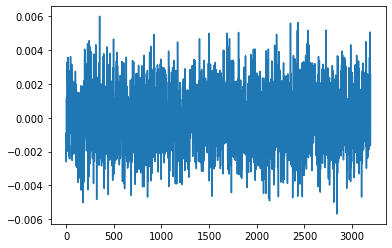

[[2489  144 2741 ...  135 1761 1869]
 [ 211  105  451 ... 1052 2608    0]
 [ 264 2781  202 ...  202 2405 2883]
 ...
 [1174 2781   79 ...  932 2598  294]
 [1239 3062 1763 ...  855 1805 2485]
 [1104 2764 2982 ... 2709 2143 1845]]
Input: 
 'sort as thou being mine mine is thy good report how like a winter hath my absence been from thee the pleasure of the fleeting year what freezings have i felt what dark days seen what old decembers bareness everywhere and yet this time removed was summers time the teeming autumn big with rich increase bearing the wanton burden of the prime like widowd wombs after their lords decease yet this abundant issue seemed to me but hope of orphans and unfathered fruit for summer and his pleasures wait on thee and thou away the very birds are mute or'

Next Word Predictions: 
 'sigh alteration beard evermore proceed ladies hems nerves dregs extant whole dressed believed tenth least surly wilfully bath mortal new plagues become renewed feed dumb lies bar jail merc

In [ ]:
# Code block 26
# ADDED JULY 24 - Seeing if the probability distribution for predicted words gets less crazy after training

x, y = get_batch(vectorized_words, seq_length=100, batch_size=32)
print("x: {}".format(x))
print("y: {}".format(y))
#pred = model(x)
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")
print(pred[0])
# We'll see it's a matrix (tensor) of 100 rows by 3195 columns. This means it contains information for 100 predicted words, which makes sense, as we input 100 words per training example (this is the seq_length)
# let's have a look at the distribution of probabilities for just the first word
print(pred[0][0])
ind = np.array(range(3195))
print(ind)
print(ind.shape)
plt.plot(ind, pred[0][0])
plt.show()
# The plot should now show a lot more strength in its convictions, because the model has learned.
# let's decode the new set of predictions and see if they're any better
print(x)
print("Input: \n", repr(" ".join(idx2word[x[0]])))
print()
print("Next Word Predictions: \n", repr(" ".join(idx2word[sampled_indices])))

In [ ]:
# Code block 27
def generate_text(model, start_string, generation_length=1000):
  # Evaluation step (generating ABC text using the learned RNN model)

  # Convert the start string to numbers (vectorize)
  input_eval = vectorize_string(start_string)
  print(input_eval)
  input_eval = [word2idx[word] for word in start_string] 
  print(input_eval)
  input_eval = tf.expand_dims(input_eval, 0)

  # Empty string to store our results
  text_generated = []

  # Here batch size == 1
  model.reset_states()
  tqdm._instances.clear()

  for i in tqdm(range(generation_length)):
      # evaluate the inputs and generate the next word predictions
      predictions = model(input_eval)
      
      # Remove the batch dimension
      predictions = tf.squeeze(predictions, 0)
      
      # use a multinomial distribution to sample
      predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
      
      # Pass the prediction along with the previous hidden state
      #   as the next inputs to the model
      input_eval = tf.expand_dims([predicted_id], 0)
      
      # add the predicted word to the generated text
      text_generated.append(idx2word[predicted_id])
    
  return ([start_string, text_generated])

In [ ]:
# Code block 28
# Use the model and the function defined above to generate song lyrics of 100 words
# Choose a word that appears in the vocabulary (lower case) to seed the generator
generated_text = generate_text(model, start_string=["shall"], generation_length=100)

[2372]
[2372]


100%|██████████| 100/100 [00:01<00:00, 71.93it/s]


In [ ]:
# Code block 29
print(generated_text)

[['shall'], ['rehearse', 'whom', 'my', 'sportive', 'blood', 'as', 'myself', 'which', 'parts', 'the', 'lovely', 'day', 'of', 'view', 'with', 'loss', 'have', 'i', 'will', 'do', 'is', 'beds', 'most', 'once', 'foiled', 'which', 'most', 'wood', 'crime', 'spent', 'crushed', 'my', 'foot', 'hath', 'more', 'weak', 'the', 'ground', 'of', 'this', 'fair', 'gift', 'in', 'heavens', 'knows', 'not', 'two', 'faith', 'case', 'that', 'when', 'thou', 'fill', 'it', 'cannot', 'is', 'not', 'thee', 'thou', 'lose', 'possession', 'of', 'steel', 'so', 'strong', 'might', 'conscience', 'right', 'and', 'from', 'towers', 'i', 'better', 'angel', 'thee', 'one', 'more', 'let', 'one', 'ten', 'times', 'more', 'not', 'than', 'from', 'leisure', 'like', 'a', 'torment', 'new', 'but', 'heaven', 'in', 'sequent', 'toil', 'may', 'hang', 'not', 'for', 'a']]


#Conclusion : #

Let us start with the last output generated by our trained model. We can observe that compared to our untrained model our trained model(after the first pass) managed to generate a much more coherent set of lyrics. Upon closer look however, the output we got as a whole does not make much sense. Relatively it is more coherent but as a whole it still feels like it is “computer generated” instead of it feeling more human like. To mitigate that we can do a couple of things first, give our RNN model a larger data set as an input to learn from. In my opinion 3195 is not sufficient data to generate more human-like writings. Secondly we can do multiple passes of our input data to extract more information out of our data, but we have to be mindful of over-training our model since that can negatively affect the output. 

After finishing this project I now have a much deeper understanding of a neural network. I now have a better understanding of all the layers of an RNN. I learned about the architecture of RNN. Different concepts such as Loss function, backpropagation through time and embedding matrix. RNN works great for natural language processing because it can take serial input of any length because the model size increases with the length of input. It takes into account the historical information of data when computing, because of this however the computation time is very slow. We can eliminate this weakness by using GPU acceleration to compute the data. It also does not take very old historical information while computing. We can use RNN for all sorts of NLP projects such as machine translation, name entity recognition, sentiment analysis and in our case lyrics generation. For each one of these applications we can use a different type of RNN. For example in our project we used one to many RNN. 

In conclusion I learned a great deal from this project about RNN and practically implemented one of many applications. I have a better understanding of various concepts of RNN that I can use in the future for a different project.
